<a href="https://colab.research.google.com/github/Guilhermegfssilva/Ciencia-de-dados/blob/main/Projeto_Final_com_Machine_Learning_Deep_Learning_Guilherme_F_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Carregar o dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Converter para um DataFrame para facilitar a manipulação
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adicionando a coluna target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Exibir um exemplo maligno (target = 1)
exemplo_maligno = df.loc[df['target'] == 1].head(5)
print("Exemplo Maligno:\n", exemplo_maligno.to_string(index=False))

# Exibir um exemplo benigno (target = 0)
exemplo_benigno = df.loc[df['target'] == 0].head(1)
print("\nExemplo Benigno:\n", exemplo_benigno.to_string(index=False))



Exemplo Maligno:
  mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
      13.540         14.36           87.46      566.3          0.09779           0.08129         0.06664             0.047810         0.1885                 0.05766        0.2699         0.7886            2.058      23.560          0.008462           0.014600          0.02387              0.013150         0.01980                 0.002300        15.110          19.26            99.70       711.2           0.14400            0.17730          0.23900        

## Exploração dos Dados

In [ ]:
#  informações gerais do dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

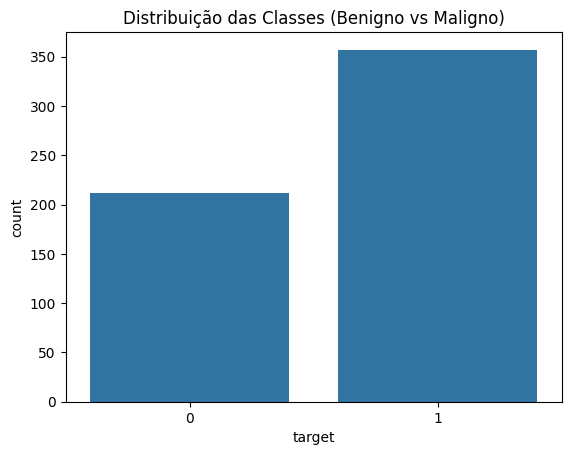

In [ ]:
# Verificar a distribuição de classes (maligno vs benigno)
sns.countplot(x='target', data=df)
plt.title('Distribuição das Classes (Benigno vs Maligno)')
plt.show()

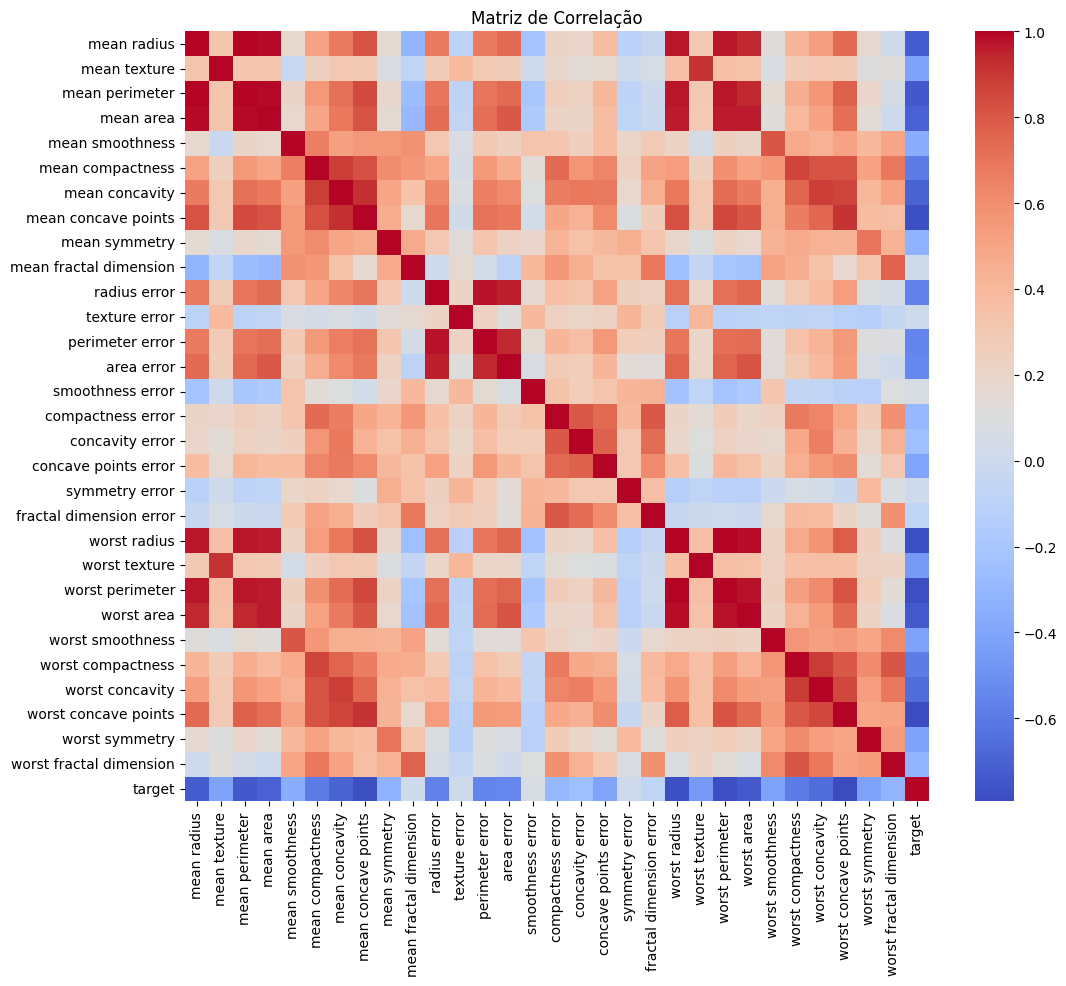

In [ ]:
# correlação entre as variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação')
plt.show()

# Pré-processamento dos Dados

In [ ]:
#verificar se possui valores ausentes
print("Valores ausentes:", df.isnull().sum().sum())

Valores ausentes: 0


In [ ]:
# Separar variáveis de entrada (X) e saída (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Normalizar as variáveis de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar o modelo de Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Treinar o modelo SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Função para avaliar o modelo
def avaliar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Avaliar cada modelo
print("Regressão Logística")
avaliar_modelo(log_reg, X_test, y_test)

print("\nRandom Forest")
avaliar_modelo(rf, X_test, y_test)

print("\nSVM")
avaliar_modelo(svm, X_test, y_test)


Regressão Logística
Acurácia: 0.97
Matriz de Confusão:
 [[41  2]
 [ 1 70]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest
Acurácia: 0.96
Matriz de Confusão:
 [[40  3]
 [ 1 70]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVM
Acurácia: 0.96
Matriz de Confusão:
 [[41  2]
 [ 3 68]]
Relatório de Classificação:
               precision    recall  f1-score   support


In [ ]:
# Dados para exemplo maligno
exemplo_maligno = np.array([12.033, 20.02, 83.52, 519.8, 0.1228, 0.0723, 0.04752, 0.02823,
                            0.1354, 0.06333, 0.2034, 2.7031, 1.406, 15.679, 0.007398, 0.006572,
                            0.02045, 0.01812, 0.03116, 0.001842, 15.900, 25.73, 88.29, 530.4,
                            0.1021, 0.05928, 0.06762, 0.06272, 0.2251, 0.07245]).reshape(1, -1)

# Normalizar os dados de exemplo usando o scaler treinado
exemplo_maligno_normalizado = scaler.transform(exemplo_maligno)

# Previsão com o modelo treinado
pred_maligno = log_reg.predict(exemplo_maligno_normalizado)

# Exibir o resultado
print("Diagnóstico do exemplo maligno:", "Maligno" if pred_maligno == 1 else "Benigno")


Diagnóstico do exemplo maligno: Maligno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# dados para exemplo benigno
exemplo_benigno = np.array([
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]).reshape(1, -1)

exemplo_benigno_normalizado = scaler.transform(exemplo_benigno)

pred_benigno = log_reg.predict(exemplo_benigno_normalizado)

print("Diagnóstico do exemplo benigno:", "Maligno" if pred_benigno == 1 else "Benigno")


Diagnóstico do exemplo benigno: Benigno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
